In [7]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Image
im = 'https://ultralytics.com/images/zidane.jpg'

# Inference
results = model(im)

results.pandas().xyxy[0]
#      xmin    ymin    xmax   ymax  confidence  class    name
# 0  749.50   43.50  1148.0  704.5    0.874023      0  person
# 1  433.50  433.50   517.5  714.5    0.687988     27     tie
# 2  114.75  195.75  1095.0  708.0    0.624512      0  person
# 3  986.00  304.00  1028.0  420.0    0.286865     27     tie


Using cache found in C:\Users\allex/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-4-24 Python-3.8.0 torch-1.13.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


requirements: C:\Users\allex\.cache\torch\hub\requirements.txt not found, check failed.


,xmin,ymin,xmax,ymax,confidence,class,name
0,743.290405,48.343658,1141.756592,720.000000,0.879861,0,person
1,441.989624,437.336731,496.585083,710.036194,0.675119,27,tie
2,123.051147,193.238098,714.690735,719.771301,0.666693,0,person
3,978.989807,313.579468,1025.302856,415.526184,0.261517,27,tie


In [8]:
import cv2
import torch
from PIL import Image

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\allex/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-4-24 Python-3.8.0 torch-1.13.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


requirements: C:\Users\allex\.cache\torch\hub\requirements.txt not found, check failed.


In [9]:
print(model)

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

  0%|          | 0.00/165k [00:00<?, ?B/s]

  0%|          | 0.00/476k [00:00<?, ?B/s]

image 1/2: 720x1280 2 persons, 2 ties
image 2/2: 1200x1600 (no detections)
Speed: 8.3ms pre-process, 144.8ms inference, 1.0ms NMS per image at shape (2, 3, 480, 640)


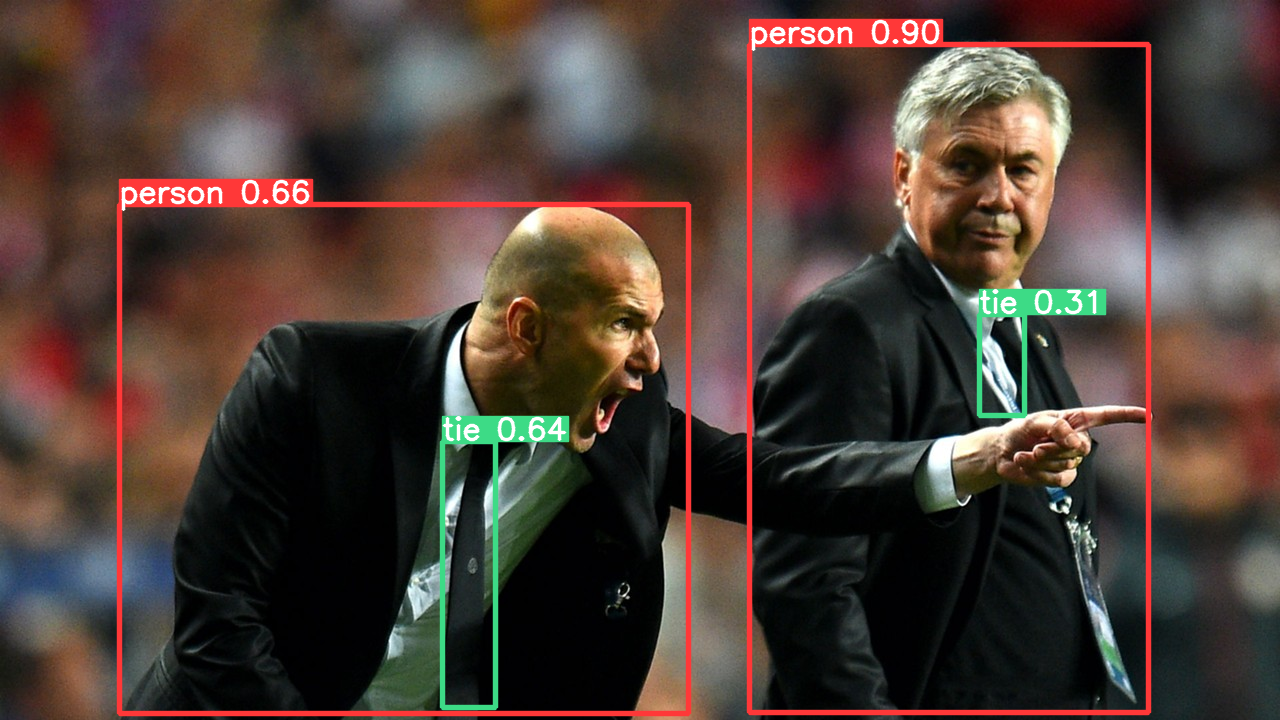

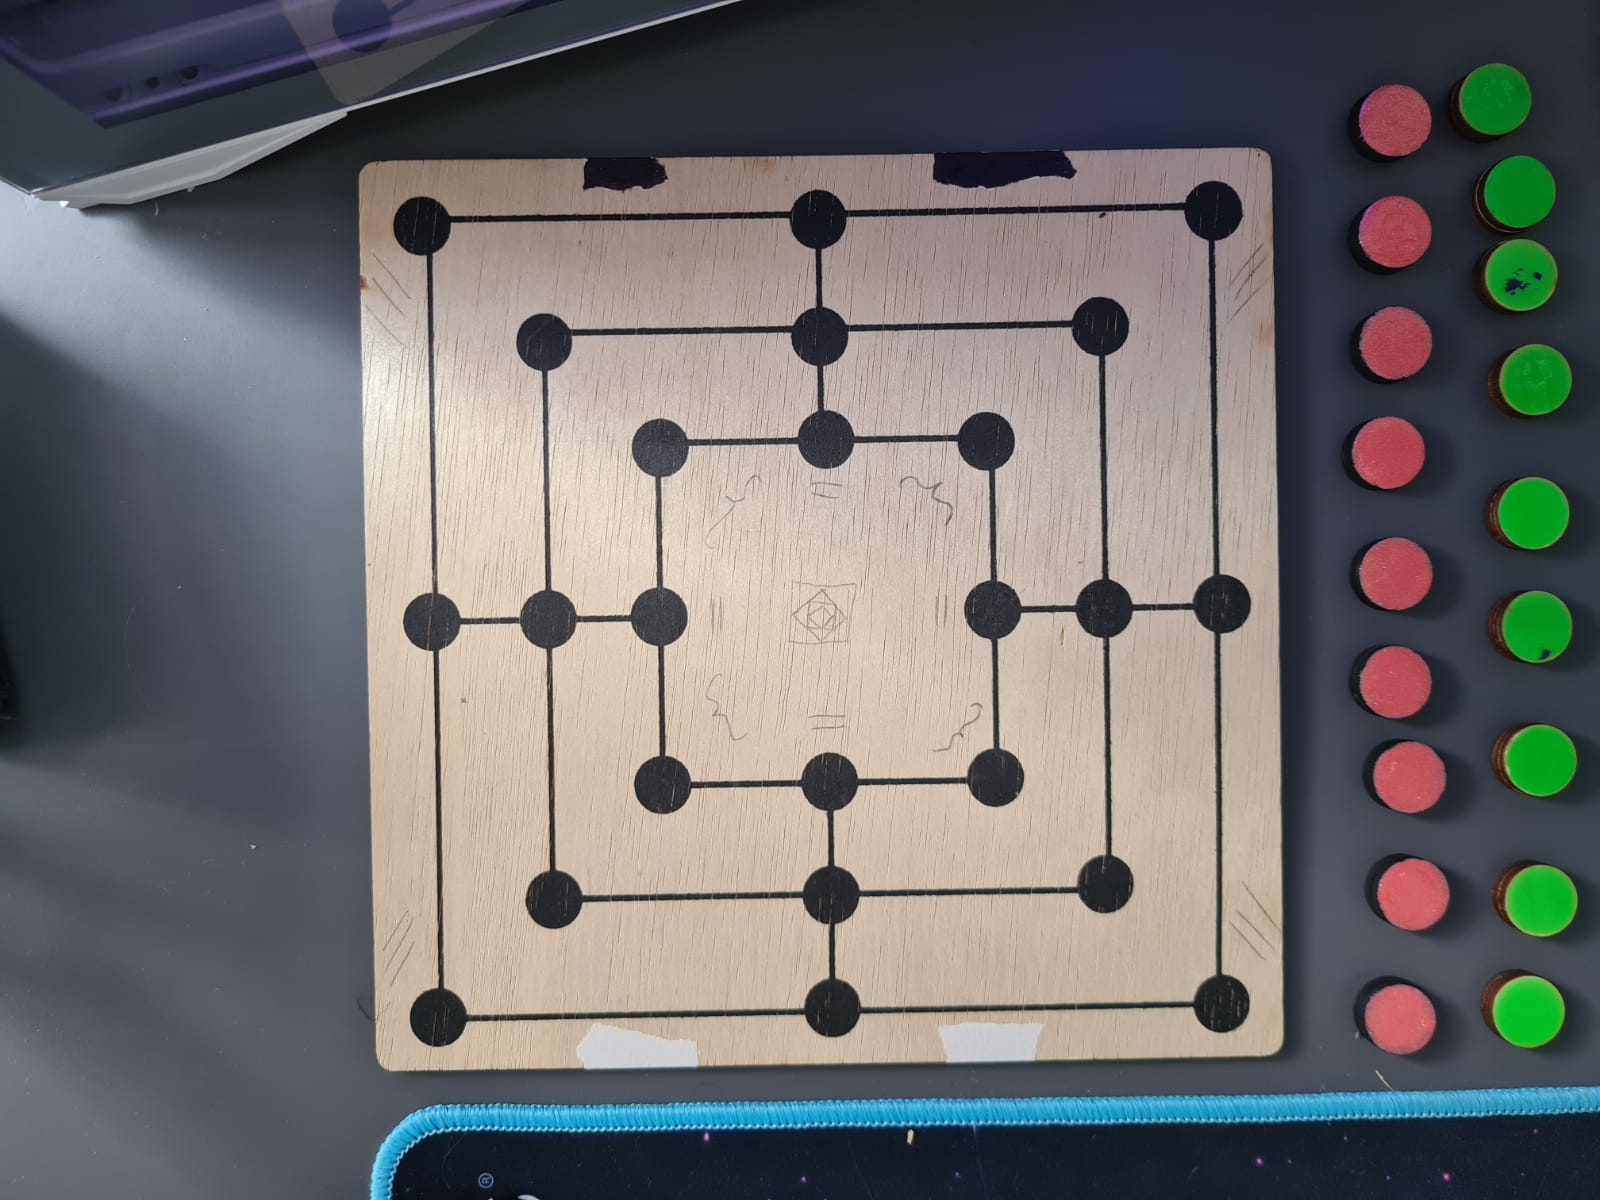

,xmin,ymin,xmax,ymax,confidence,class,name
0,749.040894,44.150024,1148.587769,712.410583,0.896505,0,person
1,119.690796,204.860535,688.696289,713.161072,0.656946,0,person
2,442.397797,441.428101,495.315582,707.339966,0.642806,27,tie
3,979.560730,314.576019,1024.915161,415.611450,0.306763,27,tie


In [2]:
# Images
for f in 'zidane.jpg', 'bus.jpg':
    torch.hub.download_url_to_file('https://ultralytics.com/images/' + f, f)  # download 2 images
im1 = Image.open('zidane.jpg')  # PIL image
im2 = cv2.imread("../resources/big_picture.jpg") # [..., ::-1]  # OpenCV image (BGR to RGB)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

# Inference
results = model([im1, im2]) # batch of images

# Results
results.print()
results.show()  # or .show()

results.xyxy[0]  # im1 predictions (tensor)
results.pandas().xyxy[0]  # im1 predictions (pandas)
#      xmin    ymin    xmax   ymax  confidence  class    name
# 0  749.50   43.50  1148.0  704.5    0.874023      0  person
# 1  433.50  433.50   517.5  714.5    0.687988     27     tie
# 2  114.75  195.75  1095.0  708.0    0.624512      0  person
# 3  986.00  304.00  1028.0  420.0    0.286865     27     tie

In [6]:
from torchsummary import summary

summary(model, (3, 480, 640))

AttributeError: 'int' object has no attribute 'lower'

In [1]:
import yolov5
import cv2 as cv

model = yolov5.load("yolov5s.pt")

image = cv2.imread("../resources/big_picture.jpg")

results = model(image)

print(results.xyxy[0])

AttributeError: module 'yolov5' has no attribute 'load'

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision.models as models
import numpy as np

# Define the number of classes and input image size
num_classes = 3
input_size = (50, 50)

# Define the modified YOLOv5s model for image classification
model = models.vgg16(pretrained=True)
model.classifier[-1] = nn.Linear(4096, num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Load the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize(input_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss/100:.4f}')
            running_loss = 0.0

# Save the trained model
torch.save(model.state_dict(), 'yolov5s_classification.pth')
